# Titanic Survival Passengers Prediction

In [129]:
%cd drive/MyDrive/MAchine\ Learning\ Projects/Titanic\ Predictions

[Errno 2] No such file or directory: 'drive/MyDrive/MAchine Learning Projects/Titanic Predictions'
/home/erik/Escritorio/Titanic Predictions


<div align= center> <img src= './titanic.jpeg'/> </div>

RMS Titanic was a British passenger liner, operated by the White Star Line, wich sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden  voyage from Southampton to New York City.

Of the estimated 2224 passengers and crew aboard, more 1500 died and 705 survived..

In this notebook, we will analyze the dataset and make a prediction model to see wich passengers  on board the ship would survive.

## Dataset Columns

- pssengerid 
- survived - 0 if the passenger not survived, 1 if survived
- pclass - passenger class, 1: 1st clas, 2: 2nd class and 3: 3rd class
- name- passenger name
- sex - passenger sex; 1: male, 0:female
- age - passenger age
- sibsp - number of siblings/spouses aboard
- parch - number of perants/children aboard
- ticket - number of ticket
- fare - passenger fare
- cabin 
- embarked - port of embarkation, (C: Cherbourg, Q: Queenstown, S: Southampton)

### Imports

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
titanic_df = pd.read_csv('./titanic.csv')
test_df = pd.read_csv('./test.csv')

In [132]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [134]:
# exploring data, statistical details, info, etc
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
titanic_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [136]:
titanic_df.shape

(891, 12)

In [137]:
# verifying if exists missing data
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
# percentage of missing data
titanic_df.isna().sum() / len(titanic_df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [139]:
test_df.isna().sum() / len(test_df) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

We can see that Cabin feature have many missing data, I think the best for this case it is droping the column, Age has a 19% of missing the data, this feature is important for the analyisi, so we can fill the missing data with the mean of the Age feature, Embarked have two missing values and also is import for the analysis, so we can find the mode and replace the missing data by the mode of embarked

### Preprocessing Data

In [140]:
# I will change the sex column, I will replace male and female by 1 and 0
titanic_df.Sex.replace({'male': 1, 'female': 0}, inplace=True)
test_df.Sex.replace({'male': 1, 'female': 0}, inplace=True)

In [141]:
# Replace Age feature missing data with the mean of Age
titanic_df.Age = titanic_df.Age.fillna( titanic_df.Age.mean() )
test_df.Age = test_df.Age.fillna( test_df.Age.mean() )

In [142]:
# Change the data type of Age feature from float 64 to int64
titanic_df.Age = titanic_df.Age.astype(np.int64)
test_df.Age = test_df.Age.astype(np.int64)

In [143]:
# drop Cabin feature
titanic_df = titanic_df.drop('Cabin', axis=1)
test_df = test_df.drop('Cabin', axis=1)

In [144]:
# embarked feature cleaning
titanic_df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [145]:
test_df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [146]:
titanic_df.Embarked = titanic_df.Embarked.fillna('S')
test_df.Embarked = test_df.Embarked.fillna('S')

In [147]:
# Change data in Embarked feature
# 1 = S
# 2 = C
# 3 = Q

titanic_df.Embarked.replace({'S': 1, 'C': 2, 'Q': 3}, inplace=True)
test_df.Embarked.replace({'S': 1, 'C': 2, 'Q': 3}, inplace=True)

In [148]:
## fill missing data in Fare feature of test dataset with the mean of Fare
test_df.Fare = test_df.Fare.fillna( test_df.Fare.mean() )

In [149]:
# Change data type of Fare feature
titanic_df.Fare = titanic_df.Fare.astype(np.int64)
test_df.Fare = test_df.Fare.astype(np.int64)

In [150]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 76.7+ KB


In [151]:
# verifying if the are missing data
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### **Exploratory Data Analysis and Visualization**

In [152]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8,1


**Number of survivors and non survivors**

<AxesSubplot:xlabel='Survived', ylabel='count'>

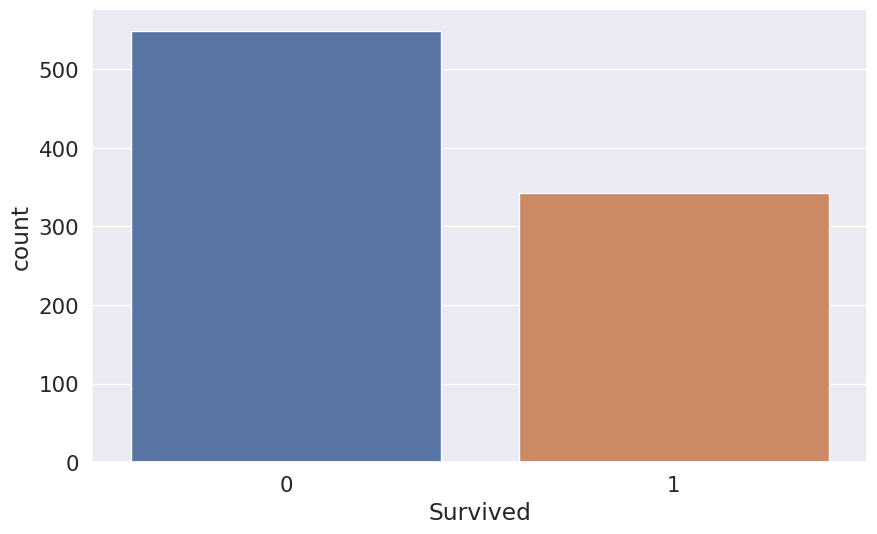

In [153]:
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot( data=titanic_df, x='Survived' )

The majority of passengers on board in this dataset died

###### **Number of passengers by sex**

In [154]:
# 1 = Male
# 0 = Female
titanic_df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

We have **577** Male passengers and **314** Female passenger

Text(0.5, 1.0, 'Number of passengers by sex')

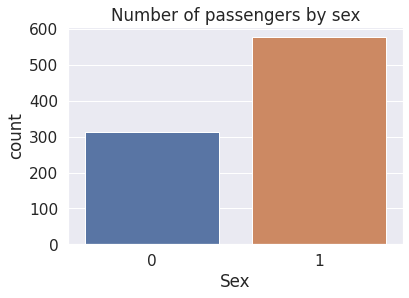

In [155]:
sns.countplot(data= titanic_df, x='Sex')
plt.title('Number of passengers by sex')

**Survivors by sex**

In [156]:
male_survivors = titanic_df[ (titanic_df.Sex == 1) & (titanic_df.Survived == 1) ][['Survived']].value_counts().values

female_survivors = titanic_df[ (titanic_df.Sex == 0) & (titanic_df.Survived == 1) ][['Survived']].value_counts().values

In [157]:
print('# of Survivors By Sex')
print(f'Female: {female_survivors} | Male: {male_survivors}')

# of Survivors By Sex
Female: [233] | Male: [109]


In [158]:
# number of survived passenger
titanic_df.pivot_table('Survived', index='Sex')

,Survived
Sex,
0,0.742038
1,0.188908


Here we can see that in the case of female passengers 74.2% has survived while 18.89% of male passengers has survived

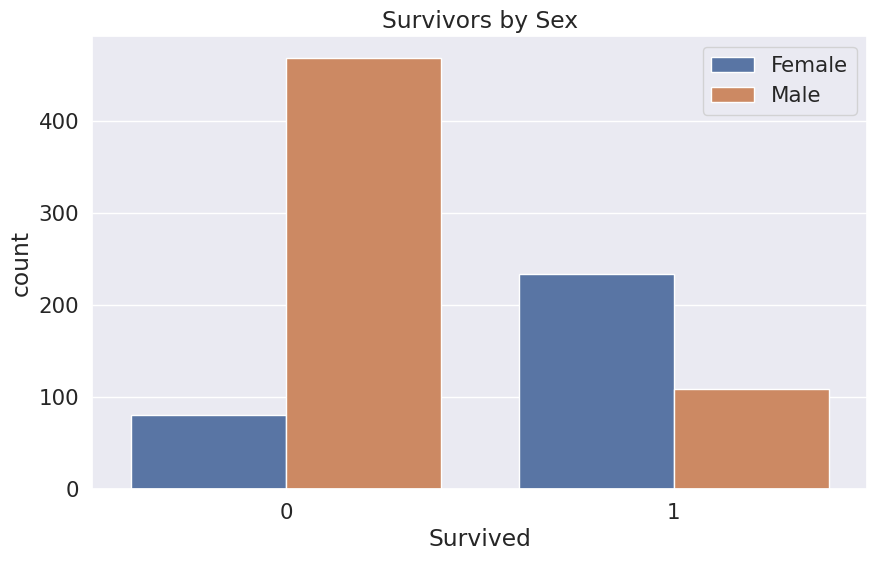

In [159]:
# countplot
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=titanic_df, x='Survived', hue='Sex')
plt.title('Survivors by Sex')
plt.legend(['Female', 'Male'])

In this case we can see that a high percentage of male passenger has died in the accident

##### **Count the number of passengers by class**

In [160]:
# Count the number of passengers by class
titanic_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

##### **Total Passengers by class and sex**

In [161]:
# pivot table
titanic_df.pivot_table('Survived', index='Sex', columns=['Pclass'], aggfunc='count')

Pclass,1,2,3
Sex,,,
0,94,76,144
1,122,108,347


##### **Survivors by class and sex in percentage**

In [162]:
titanic_df.pivot_table('Survived', index='Sex', columns=['Pclass'])

Pclass,1,2,3
Sex,,,
0,0.968085,0.921053,0.500000
1,0.368852,0.157407,0.135447


##### **Survivors by class and sex in numbers**

In [163]:
titanic_df.pivot_table('Survived', index='Sex', columns=['Pclass'], aggfunc='sum')

Pclass,1,2,3
Sex,,,
0,91,70,72
1,45,17,47


Text(0.5, 1.0, 'Survivors by class and sex')

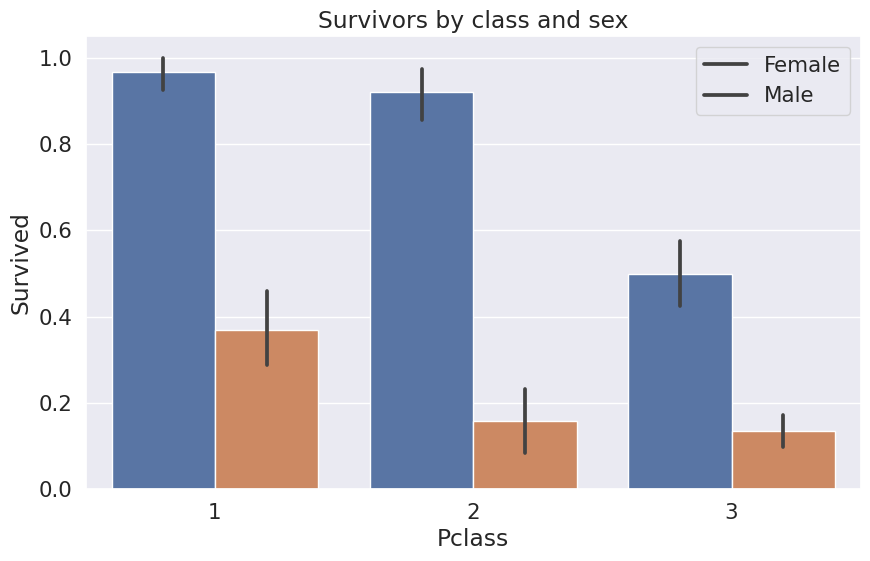

In [164]:
# visualize survivors by sex and class
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(data=titanic_df, x='Pclass', y='Survived', hue=titanic_df.Sex)
plt.legend(['Female', 'Male'])
plt.title('Survivors by class and sex')

In the first and second class the majority of female passengers did survie, while the majoritu of male passengers did not survive, in the case of third class the half of female passengers did survie and the majority of male did not survive, in the case of male passengers the third class has the lowest percentage of surviving passengers.

##### **Number of survivors by class**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

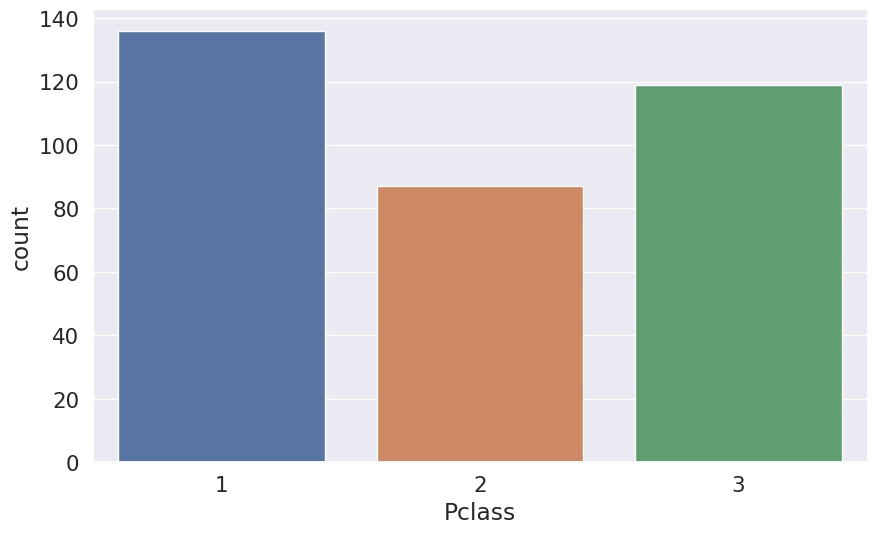

In [165]:
survivors_df = titanic_df[  titanic_df.Survived == 1 ]
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=survivors_df, x='Pclass')

##### **Survivors by age**

<AxesSubplot:xlabel='Age', ylabel='Count'>

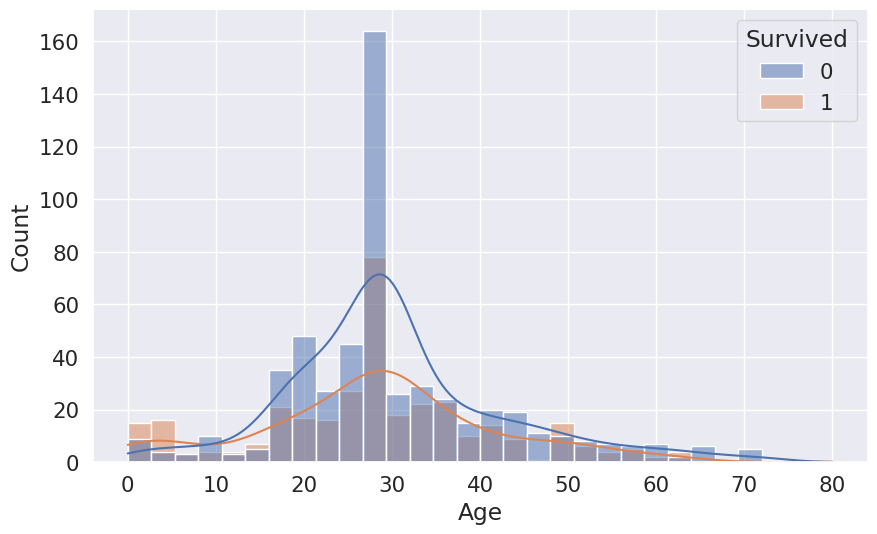

In [166]:
plt.figure(figsize=(10, 6), dpi=100)
sns.histplot(data=titanic_df, x='Age', hue='Survived', kde=True)

**Survivors by fare**

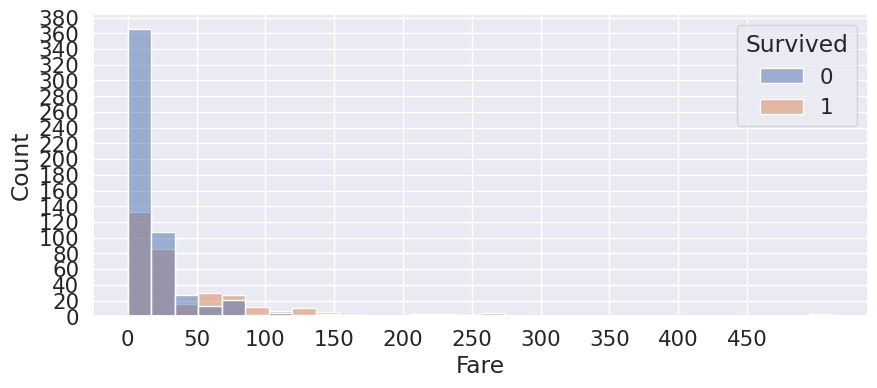

In [167]:
plt.figure(figsize=(10, 4), dpi=100)
sns.histplot(data=titanic_df, x='Fare', hue='Survived', bins=30)
plt.xticks(range(0, 500, 50))
plt.yticks(range(0, 400, 20))
plt.show()

### **Predictive Analysis**

**Separate data in X features and y variable**

We are going use in X dataset all columns except, name, passengerid, ticket and obviusly Survived.

y = Survived

In [168]:
X = titanic_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = titanic_df.Survived

In [169]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7,1
1,1,0,38,1,0,71,2
2,3,0,26,0,0,7,1
3,1,0,35,1,0,53,1
4,3,1,35,0,0,8,1


In [170]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Train | Test and Scaling**

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [173]:
# Scaling data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Logistic Model**

In [174]:
from sklearn.linear_model import LogisticRegressionCV

In [175]:
logistic_model = LogisticRegressionCV()

In [176]:
logistic_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [177]:
logistic_model.score(scaled_X_train, y_train)

0.812199036918138

In [178]:
y_pred = logistic_model.predict(scaled_X_test)

### **Metrics**

In [179]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [180]:
# accuracy score
round(accuracy_score(y_test, y_pred), 2)

0.78

In [181]:
confusion_matrix(y_test, y_pred)

array([[135,  19],
       [ 39,  75]])

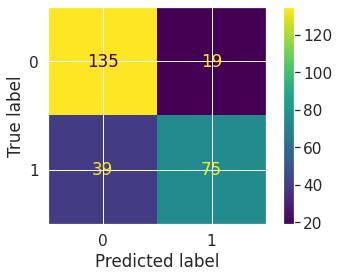

In [182]:
ConfusionMatrixDisplay( confusion_matrix(y_test, y_pred),
                      display_labels=logistic_model.classes_).plot()

In [183]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       154
           1       0.80      0.66      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



### **KNN model**

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [185]:
options = [ ('scaler', StandardScaler()), ('knn', KNeighborsClassifier()) ]

In [186]:
pipe = Pipeline(options)

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
k_values = [ x for x in range(1, 31) ]

In [189]:
param_grid = {
    'knn__n_neighbors': k_values
}

In [190]:
grid_knn_model = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [191]:
grid_knn_model.fit( X_train, y_train )

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [192]:
grid_knn_model.best_params_

{'knn__n_neighbors': 17}

In [193]:
grid_knn_model.score( X_train, y_train )

0.8298555377207063

In [194]:
knn_y_pred = grid_knn_model.predict(X_test)

In [195]:
# Metrics
accuracy_score( y_test, knn_y_pred )

0.7798507462686567

In [196]:
confusion_matrix( y_test, knn_y_pred )

array([[136,  18],
       [ 41,  73]])

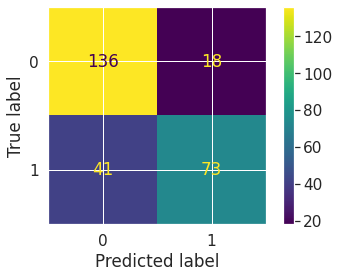

In [197]:
ConfusionMatrixDisplay( confusion_matrix(y_test, knn_y_pred),
                      display_labels=grid_knn_model.classes_).plot()

In [198]:
print( classification_report(y_test, knn_y_pred) )

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.64      0.71       114

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



### SVM Model

In [199]:
from sklearn.svm import SVC

In [200]:
svm_model = SVC()

In [201]:
svm_model.fit(scaled_X_train, y_train)

SVC()

In [202]:
svm_y_preds = svm_model.predict(scaled_X_test)

In [203]:
confusion_matrix(y_test, svm_y_preds)

array([[143,  11],
       [ 36,  78]])

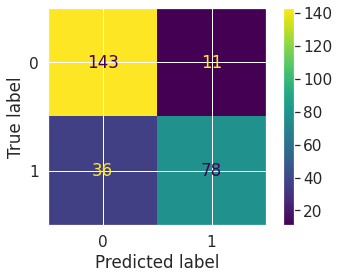

In [204]:
ConfusionMatrixDisplay( confusion_matrix(y_test, svm_y_preds),
                      display_labels=svm_model.classes_).plot()

In [205]:
print( classification_report(y_test, svm_y_preds) )

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       154
           1       0.88      0.68      0.77       114

    accuracy                           0.82       268
   macro avg       0.84      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268



### Deploy Best Model

In [232]:
from joblib import dump, load

In [233]:
dump(svm_model, 'titanic_model.joblib')

['titanic_model.joblib']

**Conclusions**

- First class of the Titanic had the majority of survivors.
- Most survivors were women
- The best ML model was Support Vector Machine with an accuracy about 0.82